In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
LABELS = ["Non_Fraudulent", "Fraudulent"]
     
import warnings
warnings.filterwarnings('ignore')
     


In [10]:
df = pd.read_csv('creditcard.csv')
df.head()
     

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
# Evaluate number of columns and rows in given dataset

Number_of_row = df.shape[0]
Number_of_column = df.shape[1]

print('Number of rows in df file     :', Number_of_row)
print('Number of columns in df file  :', Number_of_column)

Number of rows in df file     : 284807
Number of columns in df file  : 31


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Exploratory Data Analysis

In [13]:
df.isnull().values.any()

False

In [14]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Text(0, 0.5, 'Frequency')

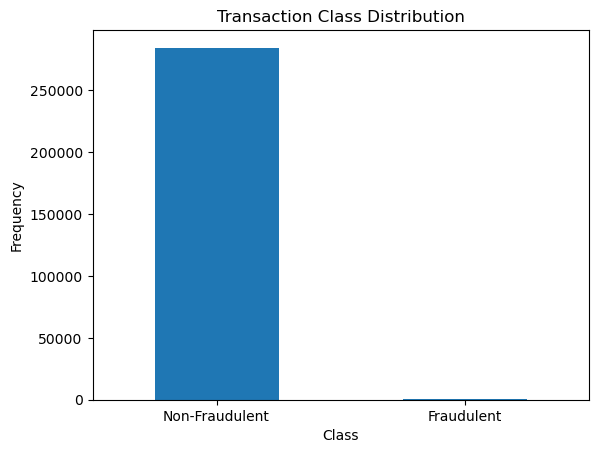

In [15]:
count_classes = pd.value_counts(df['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

#### _This Dataset is highly unbalanced

In [29]:
Non_Fraudulent= df[df["Class"] == 0]
print ("Non_Fraudulent:", Non_Fraudulent.shape)
Fraudulent= df[df["Class"] == 1]
print ("Fraudulent:", Fraudulent.shape)

Non_Fraudulent: (284315, 31)
Fraudulent: (492, 31)


In [25]:
## We need to analyze more amount of information from the transaction data
#How different are the amount of money used in different transaction classes?
Fraudulent.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [36]:
Non_Fraudulent.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [38]:
# compare the values for both transactions
df.groupby('Class').mean()
     

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


#### _Under-Sampling_

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 492

In [41]:
Non_Fraudulent_sample = Non_Fraudulent.sample(n=492)

#### _Concatenating two DataFrames_

In [43]:
new_dataset = pd.concat([Non_Fraudulent_sample, Fraudulent], axis=0)

In [31]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
214847,139843.0,2.232425,-0.681893,-1.308579,-0.865484,-0.650395,-1.455679,-0.323954,-0.421422,-0.495611,...,0.428262,1.258036,-0.005787,0.101114,0.196113,0.067270,-0.039825,-0.066688,10.00,0
73112,54985.0,-1.203265,-0.322328,3.107193,-0.782299,-0.103785,1.805125,-0.788610,0.953682,1.171759,...,0.111081,0.697754,-0.109654,-0.536722,-0.126120,1.166544,0.072711,0.050533,4.65,0
29715,35599.0,1.168909,-0.139981,-0.095518,1.735426,1.699903,4.646212,-1.191502,1.205700,0.333882,...,-0.033003,0.114218,-0.163863,1.045593,0.775343,0.228745,0.050846,0.020019,0.00,0
132837,80137.0,1.293053,0.457969,-1.940450,0.173149,2.609570,3.014117,-0.269415,0.754420,-0.221009,...,-0.121126,-0.427753,-0.159336,0.857135,0.850055,-0.311685,0.037536,0.050618,1.00,0
237220,149147.0,1.864210,0.345124,-1.134411,3.522260,0.873742,0.585860,0.249164,0.063448,-1.034836,...,-0.231299,-0.786245,0.119676,-1.179974,-0.077429,-0.220002,-0.057520,-0.060303,54.50,0


In [44]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [45]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95579.274390,0.041222,0.058743,0.098732,0.060271,-0.035804,-0.012059,0.025027,-0.013650,-0.008910,...,0.036723,-0.018360,-0.030212,0.061688,-0.027567,-0.028052,-0.018529,0.004612,-0.017467,81.051606
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


#### _Splitting the data into Features & Targets_

In [46]:
#Create X and Y

X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']
     

In [47]:

print(X)

            Time        V1        V2        V3        V4        V5        V6  \
150782   94028.0  2.032704  0.330847 -2.213901  1.107487  1.287452 -0.389235   
141187   84166.0 -0.744167  0.534337  1.724230  1.038704  0.005138 -0.947720   
226634  144725.0  1.725894 -0.321104 -1.335036  0.781453 -0.563752 -1.711227   
191839  129424.0  1.421382 -2.622433 -3.267575 -1.428155 -0.365466 -0.728727   
70906    54070.0  1.068937 -0.331762  1.035821  0.097115 -1.091805 -0.498475   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [48]:
print(Y)

150782    0
141187    0
226634    0
191839    0
70906     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


## HoldOut Validation Approach- Train And Test Split

#### _Split the data into Training data & Testing Data with 70-30 division_

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=2)
     

In [50]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [54]:
print(X_train.shape)

(787, 30)


# Model Training

#### _Logistic Regression_

In [51]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
     

In [52]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)
# LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
#                    intercept_scaling=1, l1_ratio=None, max_iter=100,
#                    multi_class='auto', n_jobs=None, penalty='l2',
#                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
#                    warm_start=False)

LogisticRegression()

#### _In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook._
#### _On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org._

# Model Evaluation

#### _Accuracy Score_

In [43]:
# accuracy on training data
from sklearn.metrics import accuracy_score
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [44]:
print('Accuracy on Training data : ', training_data_accuracy)
     

Accuracy on Training data :  0.9148665819567979


In [45]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
     

In [46]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.934010152284264
